In [46]:
# Набор данных про фейковые новости
# https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/code?datasetId=572515&sortBy=voteCount&language=Python


# Рекомендательная система
# https://www.kaggle.com/code/sanjay277/movie-recommender-system/input
# credits.csv
# keywords.csv
# movie_metadata.csv
# rating.csv

 ### Импортируем библиотеки

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

### Загрузка датасетов

In [48]:
fake_news = pd.read_csv("Fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [49]:
true_news = pd.read_csv("True.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [50]:
fake_news["fake"] = 1
fake_news.head()

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [51]:
true_news["fake"] = 0
true_news.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


### Создание общего датасета

In [52]:
news = pd.concat([fake_news, true_news])
news.sample(5)

,title,text,subject,date,fake
7577,WATCH: Insider Reveals How Trump University S...,A former employee of Donald Trump s Trump Univ...,News,"March 10, 2016",1
14301,Putin to inform Saudi king about his meeting w...,MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"November 21, 2017",0
23036,POLITICAL AGITATOR: Globalist George Soros Lin...,21st Century Wire says More than 50 NGO partn...,Middle-east,"January 23, 2017",1
10736,HOUSE ISSUES SUBPOENAS for Key Obama Administr...,Finally! Remember when Senator Lyndsey Graham ...,politics,"May 31, 2017",1
2321,Five Facts About The Obama Economy That Trump...,Trump likes to pretend he was handed a mess ...,News,"March 3, 2017",1


In [53]:
news.isna().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [54]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


### Исследовательский анализ данных и визуализация

<Axes: xlabel='fake', ylabel='count'>

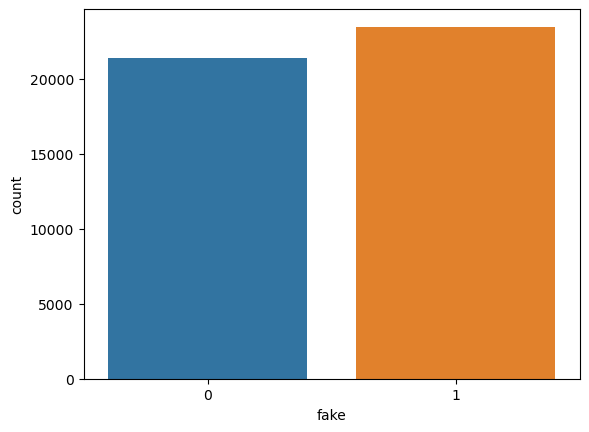

In [55]:
sns.countplot(x="fake", data=news)

Переменная `target` имеет равномерное распределение по классам

In [56]:
news[news["fake"]==1]["text"].head(4)

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
Name: text, dtype: object

In [57]:
news[news["fake"]==0]["text"].head(4)

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
Name: text, dtype: object

<Axes: xlabel='subject', ylabel='count'>

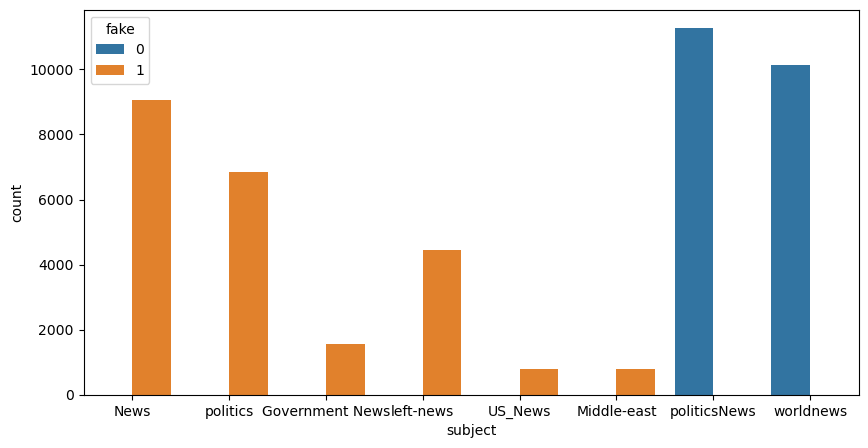

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x="subject", data=news, hue="fake")

### Инженерия признаков

In [59]:
news["date"] = pd.to_datetime(news["date"], errors="coerce")
news["Year"] = news["date"].dt.year
news["Month"] = news["date"].dt.month
news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


<Axes: xlabel='Year', ylabel='count'>

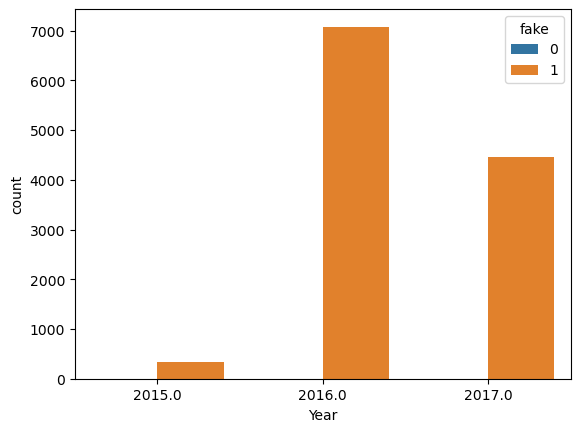

In [60]:
sns.countplot(x="Year", data=news, hue="fake")

<Axes: xlabel='Month', ylabel='count'>

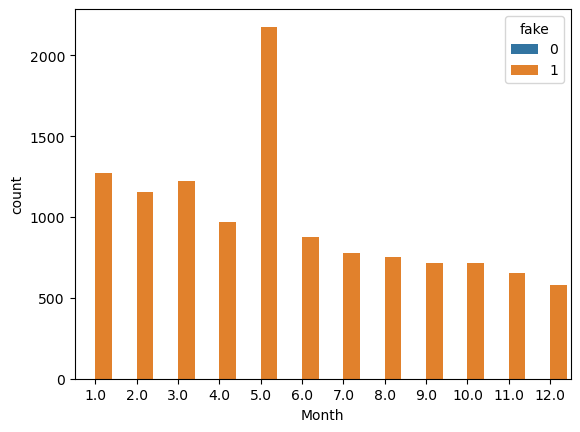

In [61]:
sns.countplot(x="Month", data=news, hue="fake")

In [63]:
news["text"] = news["title"] + news["text"]
news.drop(labels=("title"), axis=1, inplace=True)
news.head()

,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,News,2017-12-25,1,2017.0,12.0


### Финальная предобработка

In [64]:
news.drop(labels=["subject", "date", "Year", "Month"], axis=1, inplace=True)
news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


### Разбивка значений на train и test

In [65]:
news = news.sample(frac=1)
news.head()

,text,fake
18514,UPDATE: COMEY’S LEAKER Goes Into Hiding [Video...,1
4767,‘We See Only One Viable Leader’: Nonpartisan ...,1
8873,"Obama hits campaign trail, says ready to 'pass...",0
22143,NEVER BEFORE SEEN: FBI Trove of 9/11 Pentagon ...,1
18578,CHOKING ON HER LIES? HILLARY CLINTON Has Cough...,1


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news["text"].to_numpy(), news["fake"].to_numpy(), test_size = 0.2, random_state=42)

In [67]:
len(X_train), len(X_test), len(y_train), len(y_test)

(35918, 8980, 35918, 8980)

In [68]:
X_train[:2], y_train[:10]

(array(['Congressmen question Trump on U.S.-Russia friendshipWASHINGTON (Reuters) - The top Republican and Democrat on the House of Representatives Intelligence Committee on Sunday cast doubt on whether Russia can become an ally of the United States, an idea President-elect Donald Trump has embraced. Republican Devin Nunes, chairman of the committee, said on “Fox News Sunday” he would like to see a U.S.-Russia friendship but does not know if it is possible. Adam Schiff, the committee’s ranking Democrat, said on CNN it would be great if Russia could be an ally, but, “It’s not realistic and we need to be clear eyed and sober about just what the Russians are about.”  ',
        'HOUSE DEMOCRATS MAKE STUNNING Move To Implement Sharia Law In AmericaWhile US citizens are outraged over the removal of Christ from pretty much every aspect of our lives, including Christmas, Democrat members of Congress are working fast and furiously to implement America s first Sharia Law...If they get their way

### Токенизация

In [69]:
round(sum([len(i.split()) for i in X_train]) / len(X_train))

416

In [71]:
max_vocab_length = 10000
max_length = 418
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, output_mode="int", output_sequence_length=max_length)
text_vectorizer.adapt(X_train)

In [72]:
sample_sentence = "Please Do Not Forget To Upvoted"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[1748,   91,   25, 2847,    3,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [73]:
import random
random_sentence = random.choice(X_train)
print(random_sentence, text_vectorizer(random_sentence))

House lifts block on Google-hosted apps, Yahoo Mail remains blacklistedWASHINGTON (Reuters) - The U.S. House of Representatives’ information technology team this week reinstated access on its internet network to software applications hosted on a Google cloud service after the company addressed potential security fears, according to an email seen by Reuters. Yahoo Mail remains inaccessible, however, and has been blacklisted since the House Information Security Office said in an April 30 memo it had detected an increase of ransomware attacks on the network.  The two restrictions were not related, but came within days of each other and made some communication among lawmakers and their staff more difficult, several congressional aides said. Devices connected to the House’s internet via Wi-Fi or ethernet cables were barred from accessing appspot.com, the domain where Alphabet Inc’s Google hosts custom-built apps, on May 3 due to concerns about a potential security vulnerability identified p

In [76]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length, output_dim = 128, embeddings_initializer="uniform", input_length=max_length)
embedding

In [77]:
random_sentence = random.choice(X_train)
print(random_sentence, embedding(text_vectorizer([random_sentence])))

Obama seeks funds to fight Zika; sees no cause for panicWASHINGTON/LONDON (Reuters) - President Barack Obama will ask the U.S. Congress for more than $1.8 billion in emergency funds to fight Zika at home and abroad and pursue a vaccine, the White House said on Monday, but he added there is no reason to panic over the mosquito-borne virus. Zika, spreading rapidly in South and Central America and the Caribbean, has been linked to severe birth defects in Brazil, and public health officials’ concern is focused on pregnant women and women who may become pregnant. Obama’s request to Congress includes $200 million for research, development and commercialization of new vaccines and diagnostic tests for the virus. At least 12 groups are working to develop a vaccine. On Monday, the London-based European Medicines Agency (EMA), Europe’s drugs regulator, said it established an expert task force to advise companies working on Zika vaccines and medicines, mirroring similar action during the two-year

### Построение модели

In [78]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)

x = embedding(x)

x = layers.LSTM(64)(x)

outputs =layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs, name="model_LSTM")

In [79]:
model.summary()
# input_1 (InputLayer) 1
# text_vectorization 418
# emb (418, 128)
# LSTM (64)
# dense 1

Model: "model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 418)               0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 418, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [80]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

In [81]:
model_history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1123/1123 [==============================] - 262s 233ms/step - loss: 0.4620 - accuracy: 0.7815 - val_loss: 0.3567 - val_accuracy: 0.8908
Epoch 2/5
1123/1123 [==============================] - 257s 229ms/step - loss: 0.3401 - accuracy: 0.8636 - val_loss: 0.1867 - val_accuracy: 0.9497
Epoch 3/5
1123/1123 [==============================] - 246s 219ms/step - loss: 0.1956 - accuracy: 0.9438 - val_loss: 0.2023 - val_accuracy: 0.9400
Epoch 4/5
1123/1123 [==============================] - 255s 227ms/step - loss: 0.2065 - accuracy: 0.9314 - val_loss: 0.2746 - val_accuracy: 0.8950
Epoch 5/5
1123/1123 [==============================] - 259s 231ms/step - loss: 0.1540 - accuracy: 0.9537 - val_loss: 0.0871 - val_accuracy: 0.9763


In [82]:
model_prediction = model.predict(X_test)
model_prediction[:10]

281/281 [==============================] - 15s 54ms/step


array([[0.03621845],
       [0.01926918],
       [0.85566807],
       [0.99619627],
       [0.03621675],
       [0.01931405],
       [0.99914306],
       [0.9991433 ],
       [0.04415978],
       [0.9991439 ]], dtype=float32)

In [84]:
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 1., 0., 0., 1., 1., 0., 1.], dtype=float32)>

In [85]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(y_test, model_preds))
print(recall_score(y_test, model_preds))
print(precision_score(y_test, model_preds))
print(f1_score(y_test, model_preds))

0.9762806236080178
0.9717526214423283
0.9824751189961056
0.9770844540075309
